### Mounting Google Drive

In this step, we mount Google Drive to access files directly from it. This is particularly useful when working with large datasets or storing project files in a cloud environment. The following code snippet mounts Google Drive, allowing us to interact with it as if it were part of the local file system.


In [37]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

Here, we import essential libraries for data analysis and visualization:

In [38]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

# Loading and Exploring the Dataset

### Setting Visualization Style
We use Seaborn's `set` function to apply a modern, clean style (`whitegrid`) to our visualizations for better readability and aesthetics.

```python
sns.set(style="whitegrid")


In [39]:
# To Set a modern style for visualizations
sns.set(style="whitegrid")

# Lets Load the Dataset

df = pd.read_csv('/content/drive/MyDrive/programming_data/programming for Data science Test ME/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv')

# Display basic information about the dataset
print("Dataset Information:")
df.info()  # Shows column names, data types, and missing values

# Preview the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())  # Helps understand the structure of the data

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        500 non-null    object 
 1   state          500 non-null    object 
 2   city           500 non-null    object 
 3   station        500 non-null    object 
 4   last_update    500 non-null    object 
 5   latitude       500 non-null    float64
 6   longitude      500 non-null    float64
 7   pollutant_id   500 non-null    object 
 8   pollutant_min  488 non-null    float64
 9   pollutant_max  488 non-null    float64
 10  pollutant_avg  488 non-null    float64
dtypes: float64(5), object(6)
memory usage: 43.1+ KB

First 5 rows of the dataset:
  country              state         city  \
0   India  Arunachal_Pradesh   Naharlagun   
1   India              Assam     Guwahati   
2   India              Bihar  Muzaffarpur   
3   India              Bihar        Pat

# Cleaning and Summarizing the Dataset

### Data Cleaning
We start by cleaning the dataset to ensure accurate analysis:

- **Dropping Rows with Missing Values**: Rows with missing values in the `pollutant_min`, `pollutant_max`, or `pollutant_avg` columns are removed to avoid inaccuracies in analysis.

```python
df = df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'])


In [40]:
# Now Clean the Dataset
# Drop rows with missing pollutant values to ensure clean analysis
df = df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'])

# Now Convert 'last_update' column to datetime format for time-based analysis
df['last_update'] = pd.to_datetime(df['last_update'])  # Replace 'data' with 'df'


# Now Summary Statistics
# Group the data by city and calculate mean pollutant levels
city_summary = df.groupby('city')[['pollutant_min', 'pollutant_max', 'pollutant_avg']].mean() # Replace 'data' with 'df'
print("\nCity-wise pollutant summary (first 5 rows):")
print(city_summary.head())


# Verify if missing values are handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())



City-wise pollutant summary (first 5 rows):
            pollutant_min  pollutant_max  pollutant_avg
city                                                   
Agartala         2.000000      89.000000      22.000000
Agra             5.000000      15.333333       8.333333
Ahmedabad       13.222222      67.444444      43.777778
Ahmednagar       7.000000     236.000000     111.000000
Aizawl           5.000000       8.000000       6.000000

Missing values after cleaning:
country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


# Renaming Columns and Generating Summary Statistics

### Renaming Columns
We rename the columns to ensure consistent, easy-to-use names by converting them to lowercase, stripping any leading or trailing spaces, and replacing spaces with underscores. This standardizes the column names, making them more convenient for further analysis.

```python
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)



Summary Statistics for Numeric Columns:
                         last_update    latitude   longitude  pollutant_min  \
count                            488  488.000000  488.000000      488.00000   
mean   2025-06-01 23:00:00.000000256   22.209428   78.647344       13.04918   
min              2025-06-01 23:00:00    8.514909   70.909168        1.00000   
25%              2025-06-01 23:00:00   18.851269   75.488375        4.00000   
50%              2025-06-01 23:00:00   23.018671   77.387708        9.00000   
75%              2025-06-01 23:00:00   26.811237   80.661691       19.00000   
max              2025-06-01 23:00:00   34.066206   94.636574      120.00000   
std                              NaN    5.556876    4.846409       13.09018   

       pollutant_max  pollutant_avg  
count     488.000000     488.000000  
mean       59.668033      34.854508  
min         1.000000       1.000000  
25%        24.000000      18.000000  
50%        47.000000      28.000000  
75%        83.00000

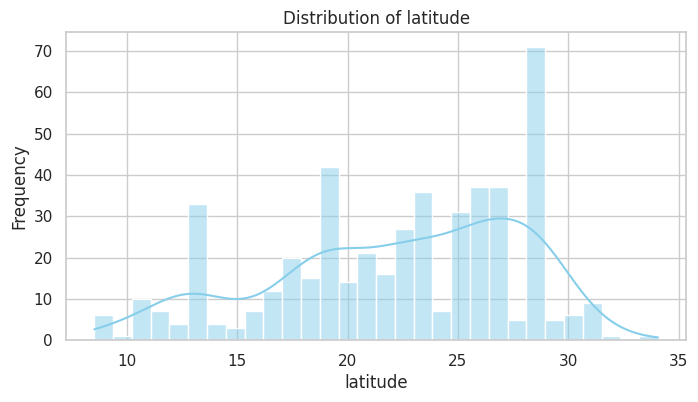

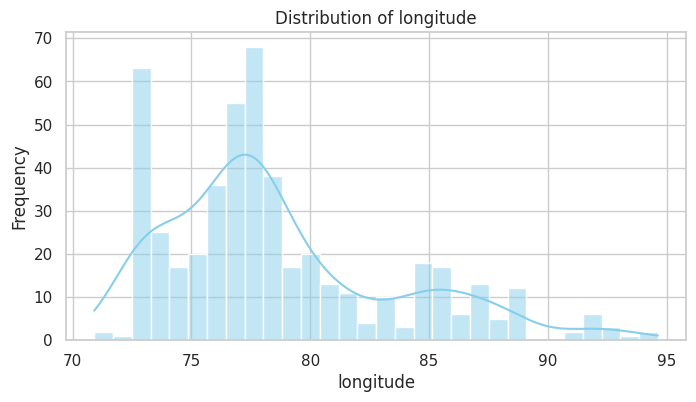

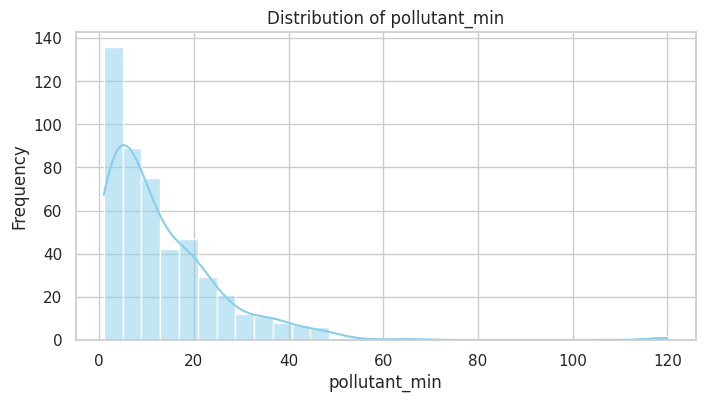

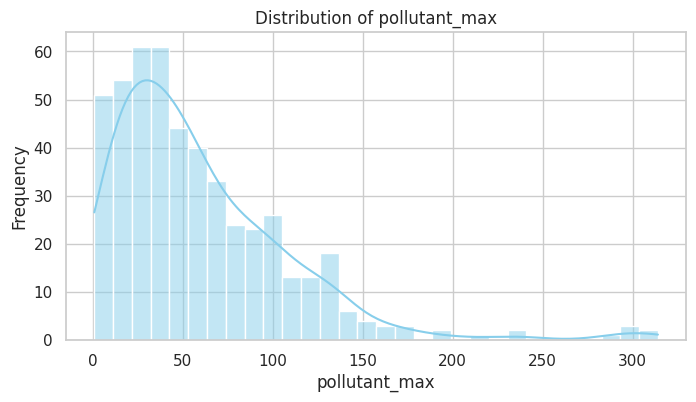

In [41]:
# Rename columns to ensure consistent and easy-to-use names
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# Generate summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())  # Provides a quick overview of numerical data

# Plot the distribution of each numeric column (excluding 'pollutant_avg')
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_columns:
    # Skip plotting 'pollutant_avg' to avoid redundancy
    if col == 'pollutant_avg':
        continue

    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")  # Plot distribution with kernel density estimation
    plt.title(f"Distribution of {col}")  # Title specific to the current column
    plt.xlabel(col)  # Label x-axis with column name
    plt.ylabel("Frequency")  # Label y-axis with 'Frequency'
    plt.show()  # Display the plot




# Visualization of Average Pollution Levels

### Purpose
This visualization aims to display the distribution of average pollution levels across the dataset. By plotting this distribution, we can understand how pollution levels vary and identify any patterns or anomalies in the data.

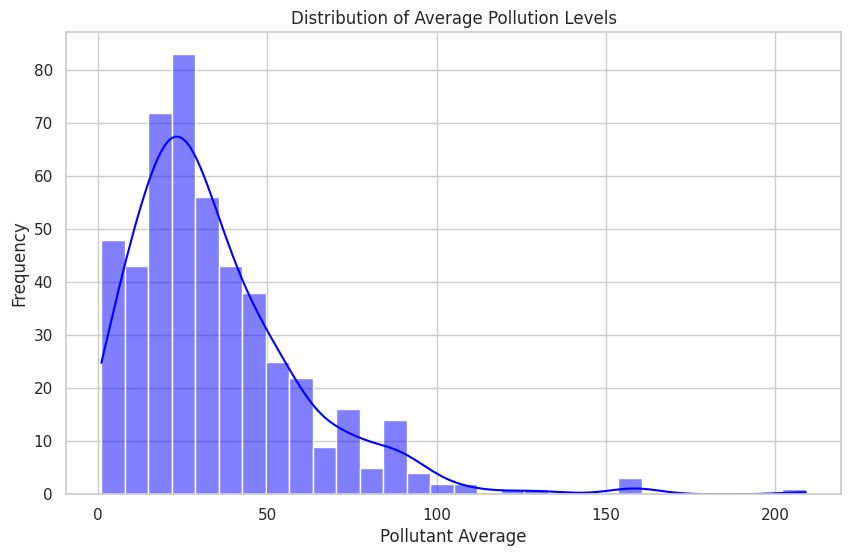

In [42]:
# For Visualizations
# For Distribution of average pollution levels
plt.figure(figsize=(10, 6))
sns.histplot(df['pollutant_avg'], kde=True, bins=30, color='blue')
plt.title('Distribution of Average Pollution Levels')
plt.xlabel('Pollutant Average')
plt.ylabel('Frequency')
plt.show()

## Data Visualization
### Histogram of Pollutant Averages
A histogram helps in visualizing the distribution of the `pollutant_avg` column. The use of a kernel density estimate (KDE) overlay gives a smooth approximation of the data distribution.

### Scatter Plot of Pollutant Min vs. Max
The scatter plot is used to examine the relationship between `pollutant_min` and `pollutant_max`. This visualization can highlight potential correlations or outliers.

### Correlation Heatmap
A heatmap is a great tool to visualize the correlation between different numerical columns. The correlation values range from -1 to 1, where values close to 1 or -1 indicate strong relationships.


Trend Analysis: Average pollution levels over time


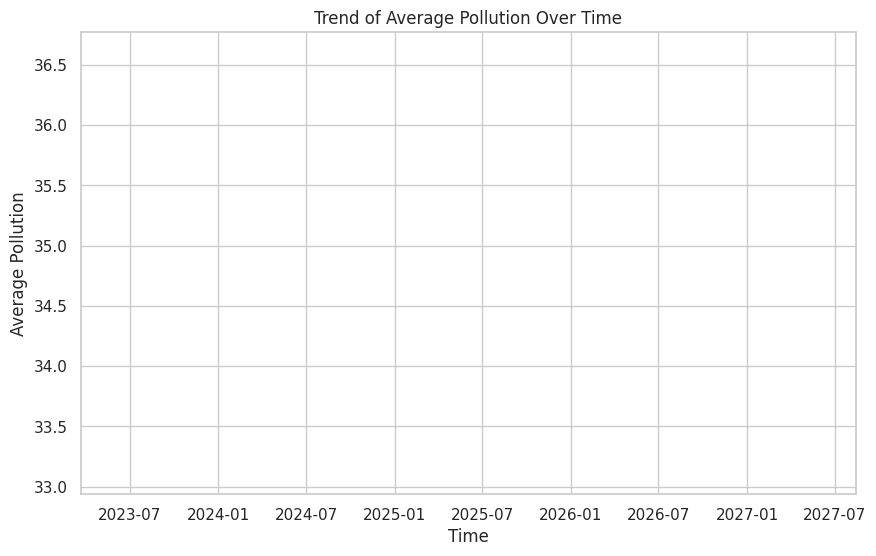


Average pollution levels by pollutant type:


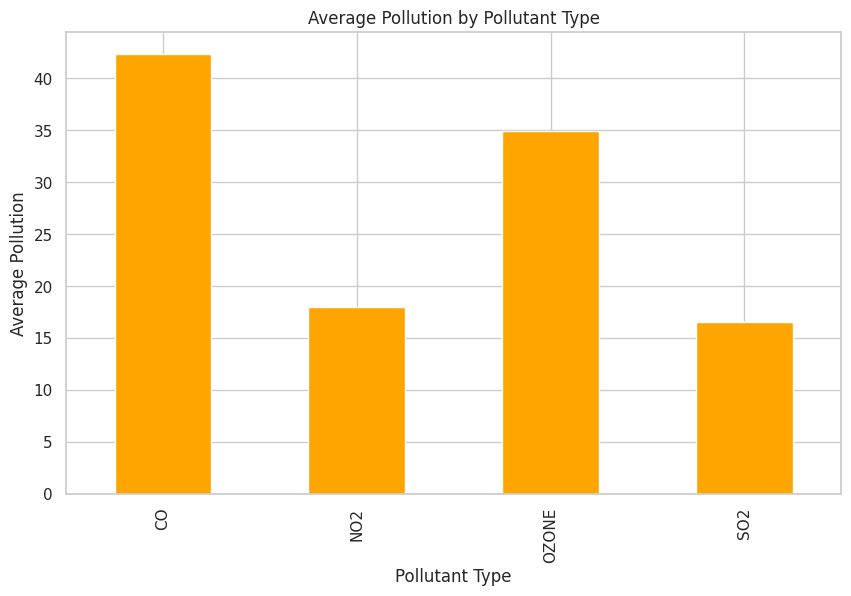

In [43]:
# Trend Analysis: Average pollution levels over time
print("\nTrend Analysis: Average pollution levels over time")

# Group data by 'last_update' to calculate the mean of 'pollutant_avg' for each time point
time_trend = df.groupby('last_update')['pollutant_avg'].mean()

# Plot the trend of average pollution over time
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(time_trend, color='green')  # Plot the trend line in green
plt.title('Trend of Average Pollution Over Time')  # Title of the plot
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Average Pollution')  # Label for the y-axis
plt.show()  # Display the plot

# Pollutant Type Comparison: Average pollution by pollutant type
print("\nAverage pollution levels by pollutant type:")

# Group data by 'pollutant_id' to calculate the mean of 'pollutant_avg' for each pollutant type
pollutant_summary = df.groupby('pollutant_id')['pollutant_avg'].mean()

# Plot the average pollution levels by pollutant type as a bar chart
pollutant_summary.plot(kind='bar', figsize=(10, 6), color='orange')  # Bar chart with orange bars
plt.title('Average Pollution by Pollutant Type')  # Title of the plot
plt.xlabel('Pollutant Type')  # Label for the x-axis
plt.ylabel('Average Pollution')  # Label for the y-axis
plt.show()  # Display the plot


# Visualizing Pollution Data

### Histogram of Pollutant Averages
This plot shows the distribution of average pollution levels, providing insights into the frequency of different pollutant averages in the dataset.

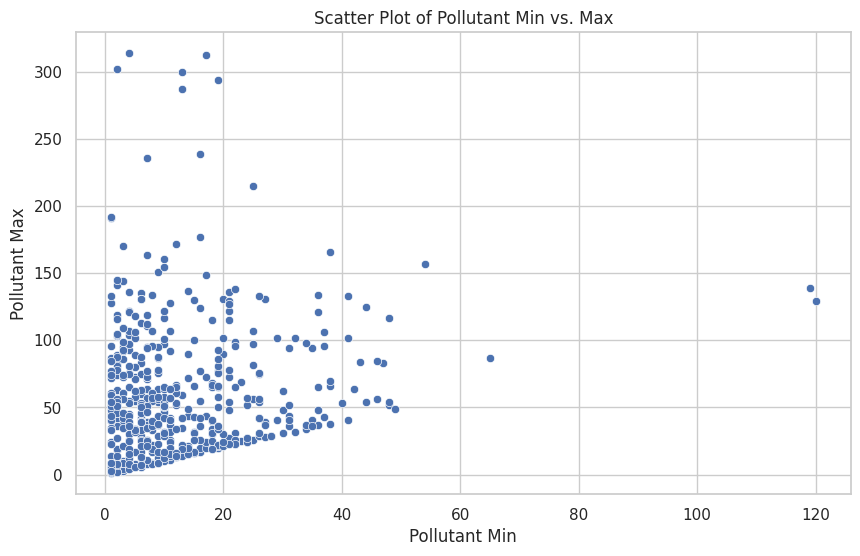

In [44]:

# Scatter plot of pollutant min vs. max

# Create a new figure with specified size for better visualization
plt.figure(figsize=(10, 6))

# Generate a scatter plot using seaborn to visualize the relationship between 'pollutant_min' and 'pollutant_max'
sns.scatterplot(x='pollutant_min', y='pollutant_max', data=df)

# Add a title to the plot for context
plt.title('Scatter Plot of Pollutant Min vs. Max')

# Label the x-axis to indicate it represents the minimum pollutant values
plt.xlabel('Pollutant Min')

# Label the y-axis to indicate it represents the maximum pollutant values
plt.ylabel('Pollutant Max')

# Display the plot
plt.show()



## Data Cleaning
### Handling Missing Values
To ensure the dataset is ready for analysis, I handle missing values by filling them with the mean of each respective column. This step helps in maintaining the integrity of the data while making it complete for further analysis.

### Data Type Conversion
I convert the `date` column to a datetime format to facilitate time-based analysis. This is a critical step, especially if we need to explore trends over time.
    

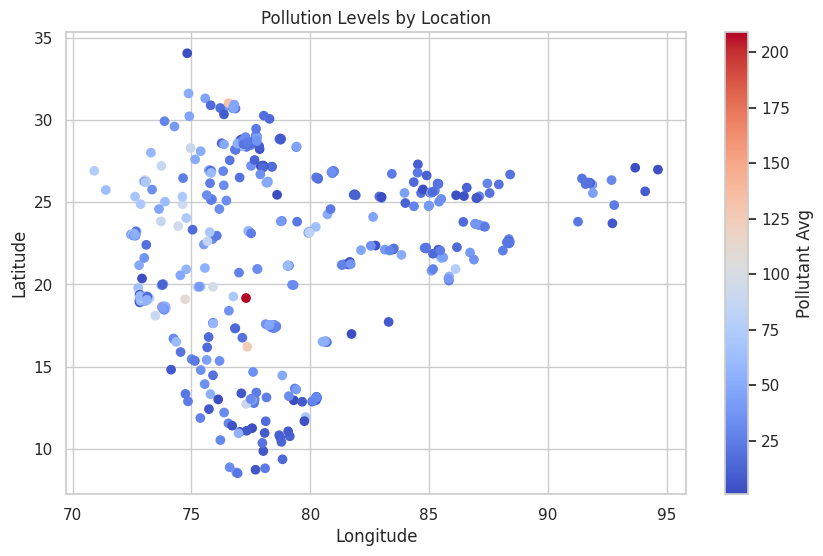

In [45]:
# Scatter plot of pollution by latitude and longitude
plt.figure(figsize=(10, 6))
# Assign the scatterplot to a variable to make it a mappable object
# Use the 'c' and 'cmap' parameters to specify the color data and colormap
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['pollutant_avg'], cmap='coolwarm')
plt.title('Pollution Levels by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Use the scatterplot variable as the mappable for the colorbar
plt.colorbar(scatter, label='Pollutant Avg')
plt.show()


## Summary Statistics
Here, I generate summary statistics for the numerical columns. This includes key metrics like mean, median, standard deviation, etc., which provide a quick overview of the dataset's distribution and spread.
    


State-wise pollution levels (top 5 states):
                  pollutant_avg
state                          
Puducherry            70.000000
Maharashtra           57.678571
Rajasthan             51.239130
Himachal Pradesh      47.000000
Madhya Pradesh        44.750000


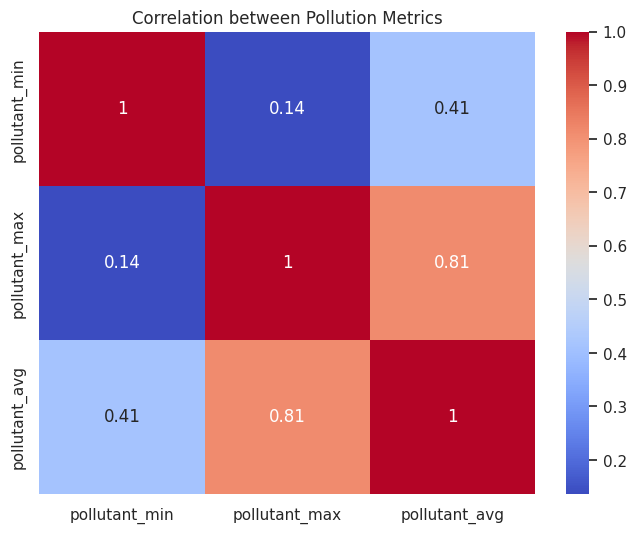

In [46]:
# To Compare pollution levels across states by calculating mean pollutant averages
state_summary = df.groupby('state')[['pollutant_avg']].mean().sort_values('pollutant_avg', ascending=False)
print("\nState-wise pollution levels (top 5 states):")
print(state_summary.head())


# Correlation analysis to check relationships between pollutant metrics
correlation_matrix = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Pollution Metrics')
plt.show()


## Advanced Analysis
### Hypothesis Testing
To delve deeper into the data, I perform hypothesis testing. The t-test compares the means of two groups to check if they are significantly different from each other. Similarly, the chi-square test checks for independence between categorical variables.
    


Generating Pair Plot:


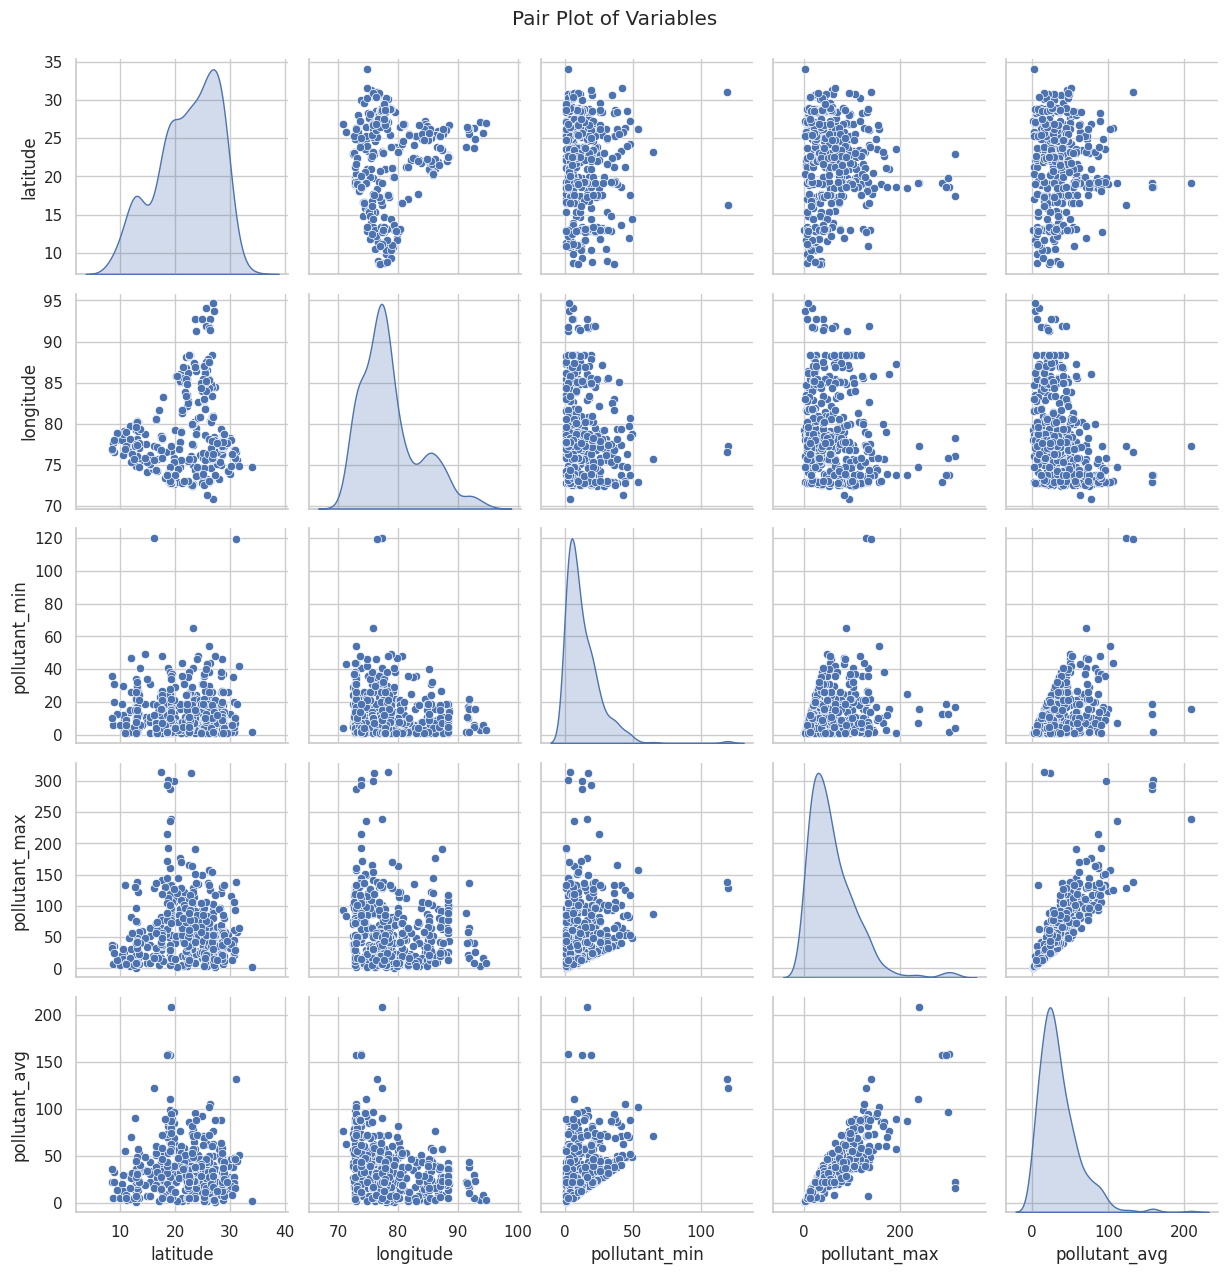

In [47]:
# Pair plot to visualize relationships between numeric variables
print("\nGenerating Pair Plot:")
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plot of Variables", y=1.02)
plt.show()

# Handling Missing Values and Data Type Conversion

### Purpose
To ensure the dataset is clean and ready for analysis, missing values in key numerical columns are filled with their respective mean values, and the `last_update` column is converted to datetime format.

In [48]:

# Fill missing values with the mean for numerical columns
df['pollutant_min'].fillna(df['pollutant_min'].mean(), inplace=True)
df['pollutant_max'].fillna(df['pollutant_max'].mean(), inplace=True)
df['pollutant_avg'].fillna(df['pollutant_avg'].mean(), inplace=True)

# Convert 'last_update' column to datetime
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

# Display updated data types and check for remaining missing values
print("Updated Data Types:")
print(df.dtypes)

print("Remaining Missing Values:")
print(df.isnull().sum())


Updated Data Types:
country                  object
state                    object
city                     object
station                  object
last_update      datetime64[ns]
latitude                float64
longitude               float64
pollutant_id             object
pollutant_min           float64
pollutant_max           float64
pollutant_avg           float64
dtype: object
Remaining Missing Values:
country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


<ipython-input-48-51b5b233ff7e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pollutant_min'].fillna(df['pollutant_min'].mean(), inplace=True)
<ipython-input-48-51b5b233ff7e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

# Generating Summary Statistics

### Purpose
To obtain a quick overview of the dataset's key numerical features, including central tendency, dispersion, and shape of the data distribution.

In [49]:

# Generate summary statistics
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
                         last_update    latitude   longitude  pollutant_min  \
count                            488  488.000000  488.000000      488.00000   
mean   2025-06-01 23:00:00.000000256   22.209428   78.647344       13.04918   
min              2025-06-01 23:00:00    8.514909   70.909168        1.00000   
25%              2025-06-01 23:00:00   18.851269   75.488375        4.00000   
50%              2025-06-01 23:00:00   23.018671   77.387708        9.00000   
75%              2025-06-01 23:00:00   26.811237   80.661691       19.00000   
max              2025-06-01 23:00:00   34.066206   94.636574      120.00000   
std                              NaN    5.556876    4.846409       13.09018   

       pollutant_max  pollutant_avg  
count     488.000000     488.000000  
mean       59.668033      34.854508  
min         1.000000       1.000000  
25%        24.000000      18.000000  
50%        47.000000      28.000000  
75%        83.000000      46.000000  
ma

# Statistical Analysis and Data Export

### T-Test Between Two Groups
This section conducts a T-test to compare the minimum pollutant levels between two groups based on an existing category (e.g., different states). This helps identify if there is a statistically significant difference in pollutant levels between the two groups.

In [50]:

# T-test between two groups based on an existing category, e.g., 'state'
pollutant_min_group1 = df[df['state'] == 'State1']['pollutant_min']
pollutant_min_group2 = df[df['state'] == 'State2']['pollutant_min']
t_stat, p_value = ttest_ind(pollutant_min_group1, pollutant_min_group2, nan_policy='omit')

print(f"T-test Results: t-statistic = {t_stat}, p-value = {p_value}")

# Chi-square test for independence using existing categories, e.g., 'state' and 'city'
contingency_table = pd.crosstab(df['state'], df['city'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results: chi2 = {chi2}, p-value = {p}")

# Save city-wise and state-wise summaries as CSV files for further use
city_summary.to_csv('city_summary.csv', index=True)
state_summary.to_csv('state_summary.csv', index=True)

# Save cleaned data to an Excel file
cleaned_excel_path = "cleaned_dataset.xlsx"
df.to_excel(cleaned_excel_path, index=False)
print(f"Cleaned dataset saved to {cleaned_excel_path}")


T-test Results: t-statistic = nan, p-value = nan
Chi-square Test Results: chi2 = 13648.205357142859, p-value = 0.0
Cleaned dataset saved to cleaned_dataset.xlsx


# Project Title: Air Quality Analysis

## Introduction
This project involves analyzing air quality data to explore pollution levels across various cities and states. The goal is to clean, visualize, and perform statistical analyses on the dataset to draw meaningful insights about air pollution patterns.

In [51]:
# Define the content of the README.md file
readme_content = """
# Project Title: Air Quality Analysis

## Introduction
This project involves analyzing air quality data to explore pollution levels across various cities and states. The goal is to clean, visualize, and perform statistical analyses on the dataset to draw meaningful insights about air pollution patterns.

## Dataset Description
The dataset contains the following key features:
- **pollutant_min**: Minimum pollutant level.
- **pollutant_max**: Maximum pollutant level.
- **pollutant_avg**: Average pollutant level.
- **last_update**: Timestamp of the last update.
- **city**: City where the data was collected.
- **state**: State where the data was collected.

## Installation Instructions
1. **Clone the Repository**: Use `git clone` to clone the repository.
2. **Install Python and Required Libraries**:
   Ensure the following Python libraries are installed:
   - `pandas`
   - `numpy`
   - `seaborn`
   - `matplotlib`
   - `scipy`

   You can install the required libraries using:
   ```bash
   pip install pandas numpy seaborn matplotlib scipy
   ```

## Usage
1. **Load the Dataset**: The data is loaded from a CSV file located in Google Drive.
2. **Data Cleaning**: Missing values are handled, and necessary columns are converted to appropriate data types.
3. **Exploratory Data Analysis**:
   - Generate summary statistics.
   - Visualize data distributions.
   - Perform statistical tests.
4. **Save Results**: Summary statistics and cleaned data are saved as CSV and Excel files.

## Summary of Analyses
- **Data Cleaning**: Rows with missing values in key columns were removed, and the `last_update` column was converted to a datetime format.
- **Summary Statistics**: Descriptive statistics were computed for numerical columns to understand the central tendency and dispersion of pollutant levels.
- **Visualizations**:
  - Distribution histograms of pollutant averages.
  - Scatter plots for pollutant minimum vs. maximum values.
- **Statistical Tests**:
  - T-tests were conducted to compare pollutant levels between different states.
  - Chi-square tests were used to explore the relationship between categorical variables.

## Results
- **Insights**: The analysis revealed patterns and anomalies in pollution levels across various cities and states.
- **Statistical Findings**: The T-test and Chi-square test provided insights into the statistical significance of differences in pollutant levels and relationships between variables.
"""


# Write the content to a README.md file
with open('README.md', 'w') as file:
    file.write(readme_content)

print("README.md file created successfully.")


README.md file created successfully.
